In [1]:
import sys
sys.path.append("..")
import lovely_tensors as lt
from tqdm import tqdm
import os
import pandas as pd
from torchvision.transforms.functional import to_pil_image
lt.monkey_patch()

In [3]:
from grins.data.mit_place_pulse.dataset import MITPlacePulseDataset
from grins.config import EXTERNAL_DATA_DIR

In [4]:
ds = MITPlacePulseDataset("../data/external/mit-place-pulse", split="train")

In [5]:
tasks = set()
for i in range(len(ds)):
    tasks.add(ds[i]["question"])
    if len(tasks) == 6:
        break
print(tasks)

{'livelier', 'more depressing', 'wealthier', 'more boring', 'safer', 'more beautiful'}


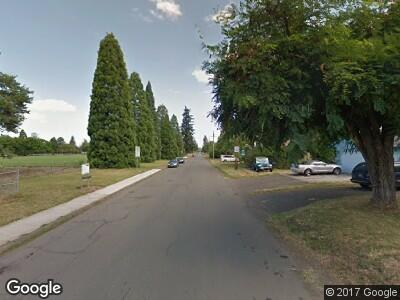

In [6]:
# show image0 as PIL
to_pil_image(ds[0]["image0"])

In [7]:
import torch
from transformers import AutoImageProcessor, AutoModel
from transformers.image_utils import load_image

pretrained_model_name = "facebook/dinov3-vitb16-pretrain-lvd1689m"
processor = AutoImageProcessor.from_pretrained(pretrained_model_name)
model = AutoModel.from_pretrained(
    pretrained_model_name, 
    device_map="auto", 
)

inputs = processor(images=ds[0]["image0"], return_tensors="pt").to(model.device)
print(inputs)
with torch.inference_mode():
    outputs = model(**inputs)

pooled_output = outputs.pooler_output
pooled_output, outputs.last_hidden_state[0, 0]

/home/nicola/Development/GRINS/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'pixel_values': tensor[1, 3, 224, 224] n=150528 (0.6Mb) x∈[-2.118, -1.787] μ=-1.979 σ=0.133 cuda:0}


(tensor[1, 768] 3Kb x∈[-4.918, 1.433] μ=0.018 σ=0.470 cuda:0,
 tensor[768] 3Kb x∈[-4.918, 1.433] μ=0.018 σ=0.470 cuda:0)